In [40]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
current_directory = os.path.dirname(os.path.abspath("EDA Telco Customer Churn.ipynb"))

In [3]:
df = pd.read_csv(current_directory + "\\Data_Telco\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
print('Number of rows: ', df.shape[0]) 
print('Number of columns: ', df.shape[1]) 

Number of rows:  7043
Number of columns:  21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Preprocessing

In [6]:
#drop column 'customerID'
df.drop('customerID', axis=1, inplace= True)

In [7]:
print("nunique value ['TotalCharges']:", df['TotalCharges'].nunique())

nunique value ['TotalCharges']: 6531


In [8]:
#There's Mising Value in column 'TotalCharges' so couldn't change the datatype directly into float
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)

#change the data type into float
df['TotalCharges'] = df['TotalCharges'].astype(float)

#fill the missing value with average value of 'TotalCharges'
df['TotalCharges'] = df['TotalCharges'].fillna(round(df['TotalCharges'].mean(), 4))

In [10]:
object_type_data = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in object_type_data.items():
    print(f'{key}: {value}')

gender: ['Female', 'Male']
Partner: ['Yes', 'No']
Dependents: ['No', 'Yes']
PhoneService: ['No', 'Yes']
MultipleLines: ['No phone service', 'No', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes', 'No internet service']
OnlineBackup: ['Yes', 'No', 'No internet service']
DeviceProtection: ['No', 'Yes', 'No internet service']
TechSupport: ['No', 'Yes', 'No internet service']
StreamingTV: ['No', 'Yes', 'No internet service']
StreamingMovies: ['No', 'Yes', 'No internet service']
Contract: ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: ['Yes', 'No']
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn: ['No', 'Yes']


`In 'MultipleLines' column there are value 'No' and 'No phone service' that essentially the same thing,
so we should convert this value into 'No' to avoid double meaning in one column. list of column:`

1. MultipleLines
2. OnlineSecurity
3. DeviceProtection
4. TechSupport
5. StreamingTV
6. StreamingMovies

In [11]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df[['OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies']] = df[['OnlineSecurity', 
                              'OnlineBackup', 
                              'DeviceProtection', 
                              'TechSupport', 
                              'StreamingTV', 
                              'StreamingMovies']].replace('No internet service', 'No')

In [12]:
#Check the result
object_type_data = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in object_type_data.items():
    print(f'{key}: {value}')

gender: ['Female', 'Male']
Partner: ['Yes', 'No']
Dependents: ['No', 'Yes']
PhoneService: ['No', 'Yes']
MultipleLines: ['No', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes']
OnlineBackup: ['Yes', 'No']
DeviceProtection: ['No', 'Yes']
TechSupport: ['No', 'Yes']
StreamingTV: ['No', 'Yes']
StreamingMovies: ['No', 'Yes']
Contract: ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: ['Yes', 'No']
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn: ['No', 'Yes']


`After handling any missing value or any double meaning value in column that have object datatype, time to handling missing value in other column`

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
#chacking if there's a missing value (0) in numerical columns
type_data = {column: list(df[column].where(df[column] == 0).value_counts()) for column in df.select_dtypes('number').columns}
print('Sum of 0 value in each numeric column')
for key, value in type_data.items():
    print(f'{key}: {value}')

Sum of 0 value in each numeric column
SeniorCitizen: [5901]
tenure: [11]
MonthlyCharges: []
TotalCharges: []


In [15]:
#chacking if there's a missing 
# df['tenure'].value_counts()

In [16]:
#Replace missing value it with average value
df['tenure'] = df['tenure'].replace(0, int(df['tenure'].mean()))

In [17]:
#chacking if there's a missing value (0) in numerical columns
type_data = {column: list(df[column].where(df[column] == 0).value_counts()) for column in df.select_dtypes('number').columns}
print('Sum of 0 value in each numeric column')
for key, value in type_data.items():
    print(f'{key}: {value}')

Sum of 0 value in each numeric column
SeniorCitizen: [5901]
tenure: []
MonthlyCharges: []
TotalCharges: []


In [18]:
#chacking if there's a missing 
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

In [19]:
# df.to_csv('clean_dataset.csv', index = False)

# EDA

In [20]:
df = pd.read_csv(current_directory + "\\clean_dataset_EDA.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df_describe = df.describe()
df_describe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.421127,64.761692,2283.300441
std,0.368612,24.526087,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Churn Distribution

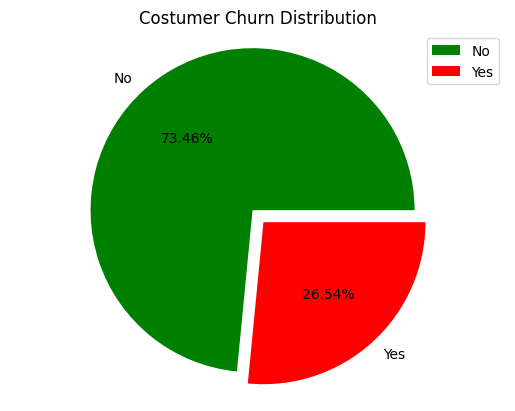

In [22]:
value = Counter(df['Churn'])
colors = ['g', 'r']
labels = []
sizes = []
for x, y in value.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, explode=[0.1, 0], autopct="%1.2f%%", colors=colors)
plt.title("Costumer Churn Distribution")
plt.legend()
plt.axis('equal')
plt.show()

Out of all the customers, `73.46% of people won't churn.`

## Distribution of Various Numeric Features

In [23]:
from random import randint
def distribution_plot(feature, frame):
    color = ['r', 'g', 'b', 'c', 'm', 'y', 'lightcoral', 'skyblue', 'teal', 'chocolate', 'orange']
    num_color = randint(0, 10)
    plt.figure(figsize=(8,3))
    plt.title(f"Distribution for {feature}")
    ax = sns.histplot(frame[feature], color= color[num_color], kde=True)

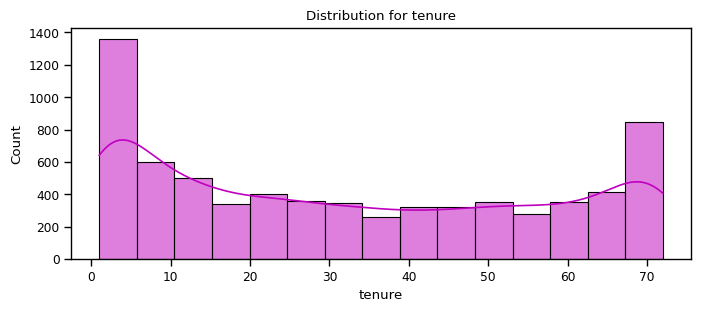

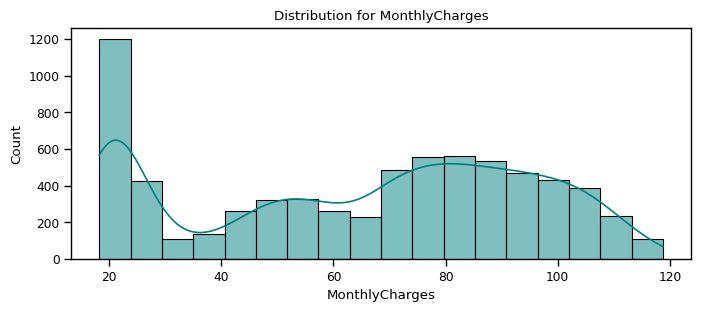

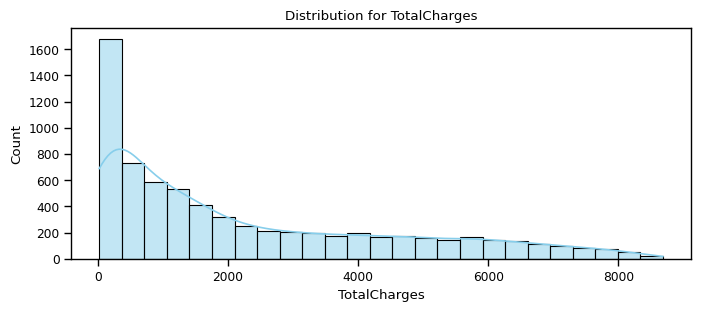

In [24]:
sns.set_context("paper",font_scale=1)
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distribution_plot(feat, df)

## Distribution of various numric features by Churn

In [82]:
def distribution_byChurn(feature, frame):
    fig = plt.figure(figsize = (8, 3))
    sns.histplot(x= df[feature], hue= df['Churn'], bins=15, kde=True, palette=['y', 'r'])
    plt.title(f"Distribution of {feature} by Churn")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

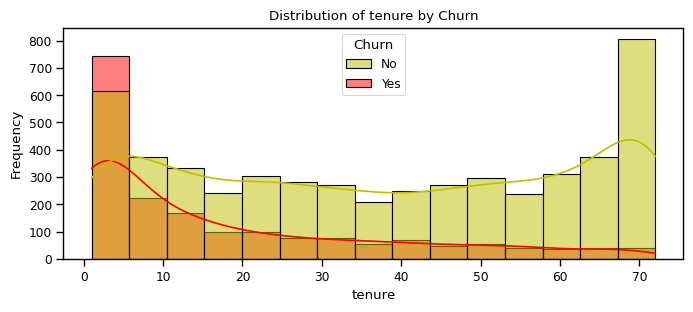

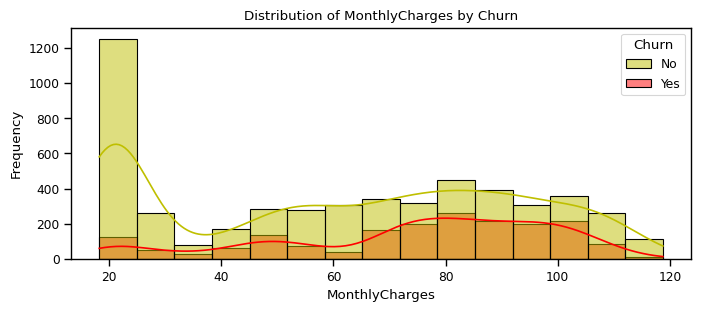

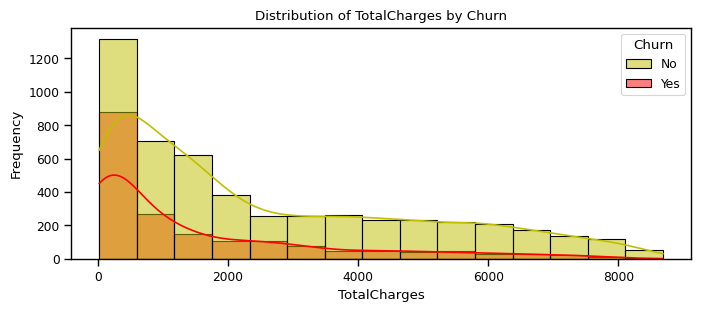

In [83]:
sns.set_context("paper",font_scale=1)
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for colmn in num_cols: distribution_byChurn(colmn, df)

**The more months the customer stays** with the company, **the less likely it is that he/she will churn**. The total charges column is clearly skewed

## Find Outlier for Various Features distinguised by Churn

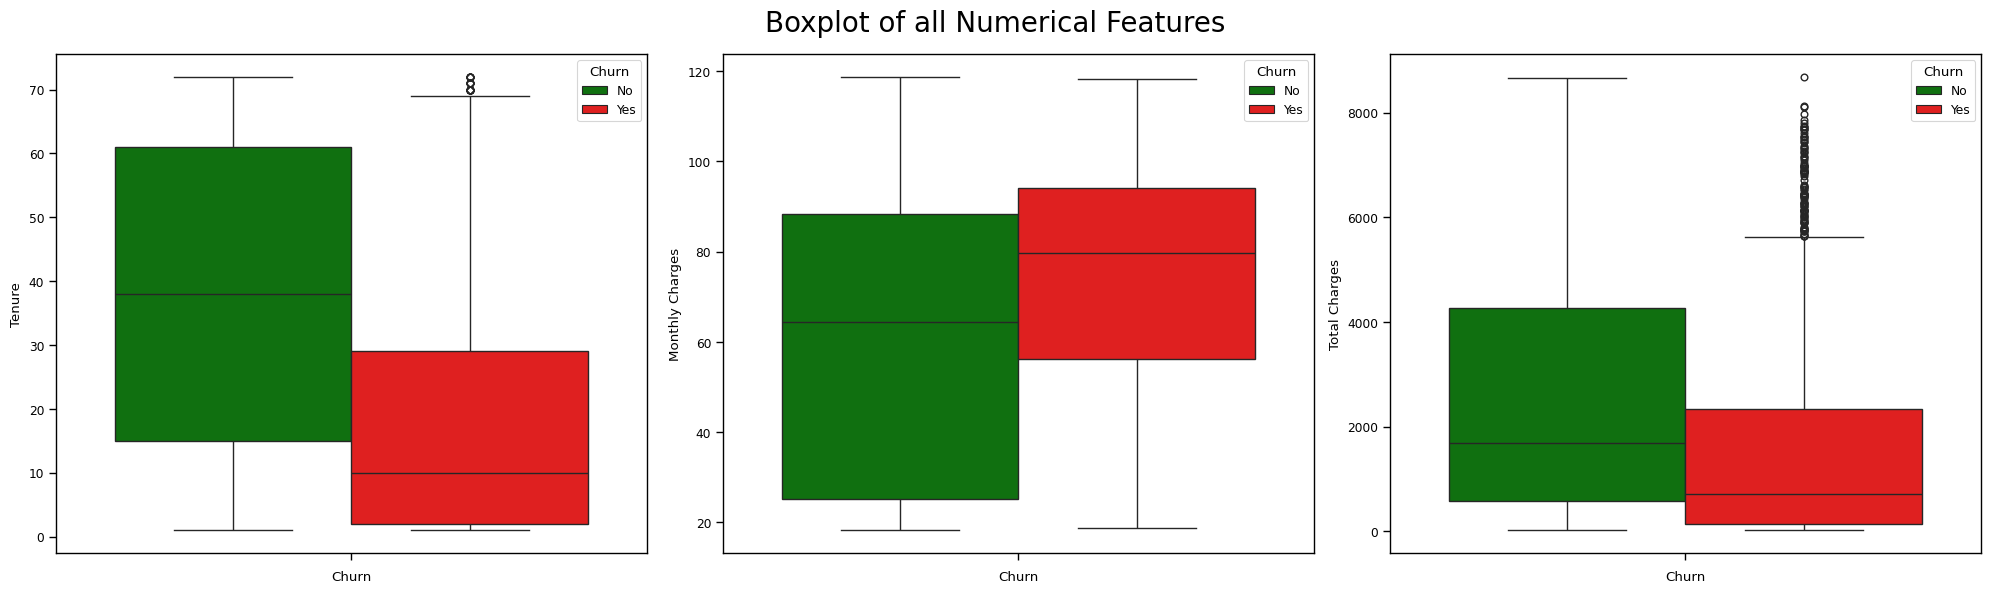

In [88]:
sns.set_context("paper",font_scale=1)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Boxplot of all Numerical Features', fontsize = 20)

ax1 = sns.boxplot(y = df['tenure'], ax= ax[0], hue=df['Churn'], palette= ['g', 'r'])
ax1.set(xlabel= 'Churn', ylabel= 'Tenure')

ax2 = sns.boxplot(y = df['MonthlyCharges'], ax= ax[1], hue=df['Churn'], palette= ['g', 'r'])
ax2.set(xlabel= 'Churn', ylabel= 'Monthly Charges')

ax3 = sns.boxplot(y = df['TotalCharges'], ax= ax[2], hue=df['Churn'], palette= ['g', 'r'])
ax3.set(xlabel= 'Churn', ylabel= 'Total Charges')

plt.tight_layout()
plt.show()

## Correlation

In [29]:
df_corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

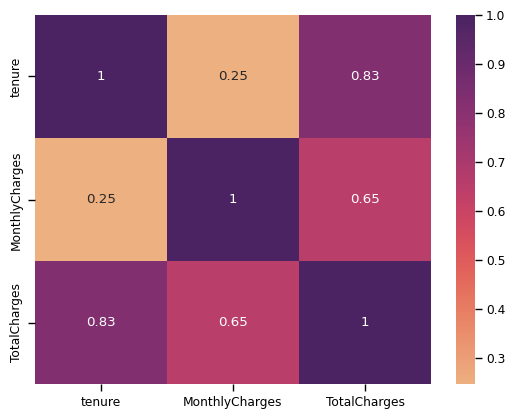

In [30]:
sns.set_context("paper",font_scale=1)
sns.heatmap(df_corr.corr(numeric_only=1), cmap = 'flare', annot = True)
plt.show()

`There is some correlation between tenure and total charges`

## Count Plot for various categorial features

In [56]:
def plot_various_categorial(frame, list_feature, hue_col_name, nrows, ncols, figsize):
    fig, axs = plt.subplots(nrows, ncols, figsize = figsize)
    fig.suptitle('\nCount plot for various categorical features', fontsize = 25)
    
    for feature, ax in zip(list_feature, axs.ravel()):
        
        sns.countplot(x =feature, data= frame, ax= ax, hue= hue_col_name, palette= ['g', 'r'])
        ax.set_xlabel(feature)
    
    plt.show()

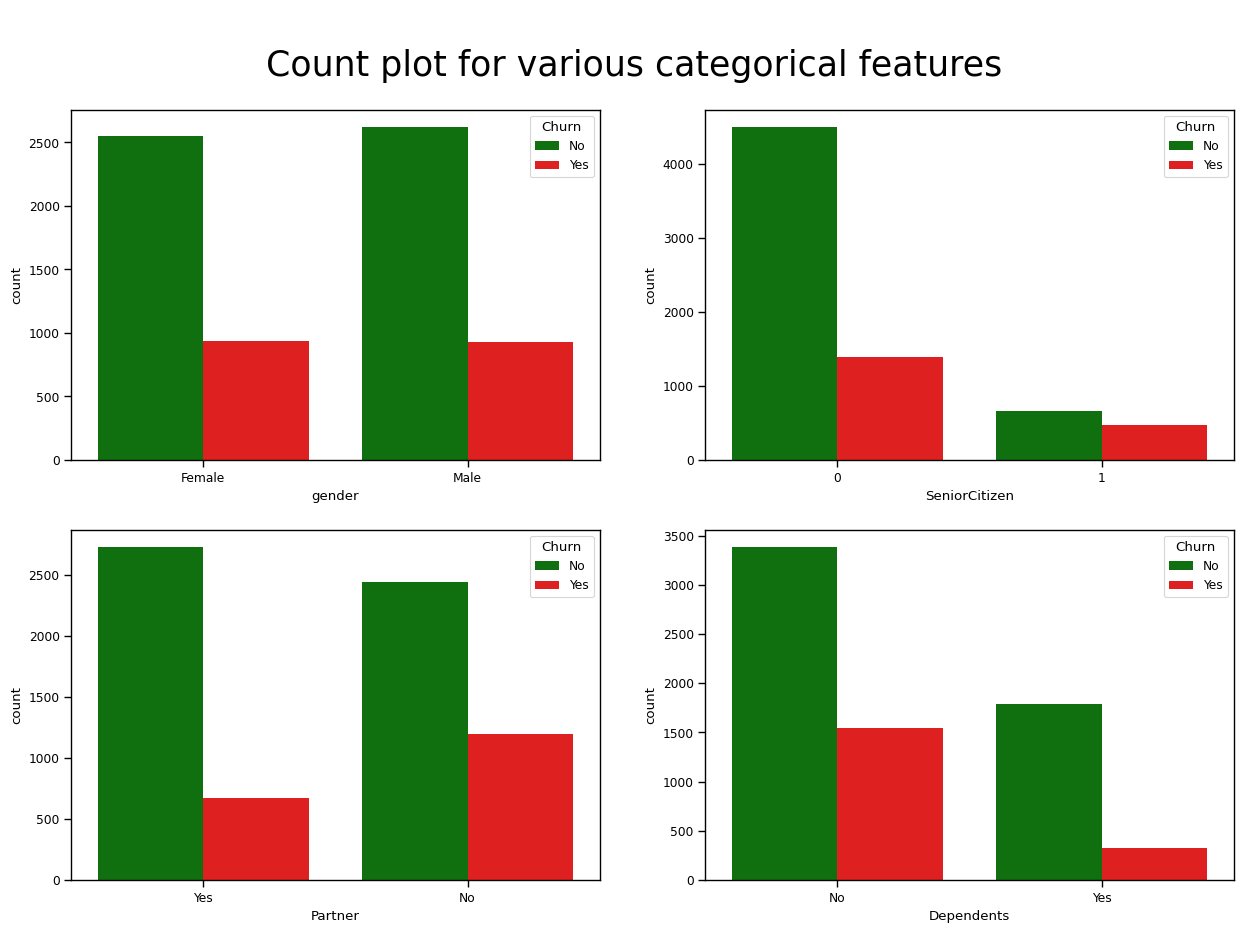

In [32]:
sns.set_context("paper",font_scale=1)
list_feature = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
plot_various_categorial(df, list_feature, 'Churn', 2, 2, (15, 10))

Based on the `demographic information,` it is clear that Senior Citizens are much more likely to churn, also, customers not having a partner have higher chances of churning as compared to customers who do have a partner.

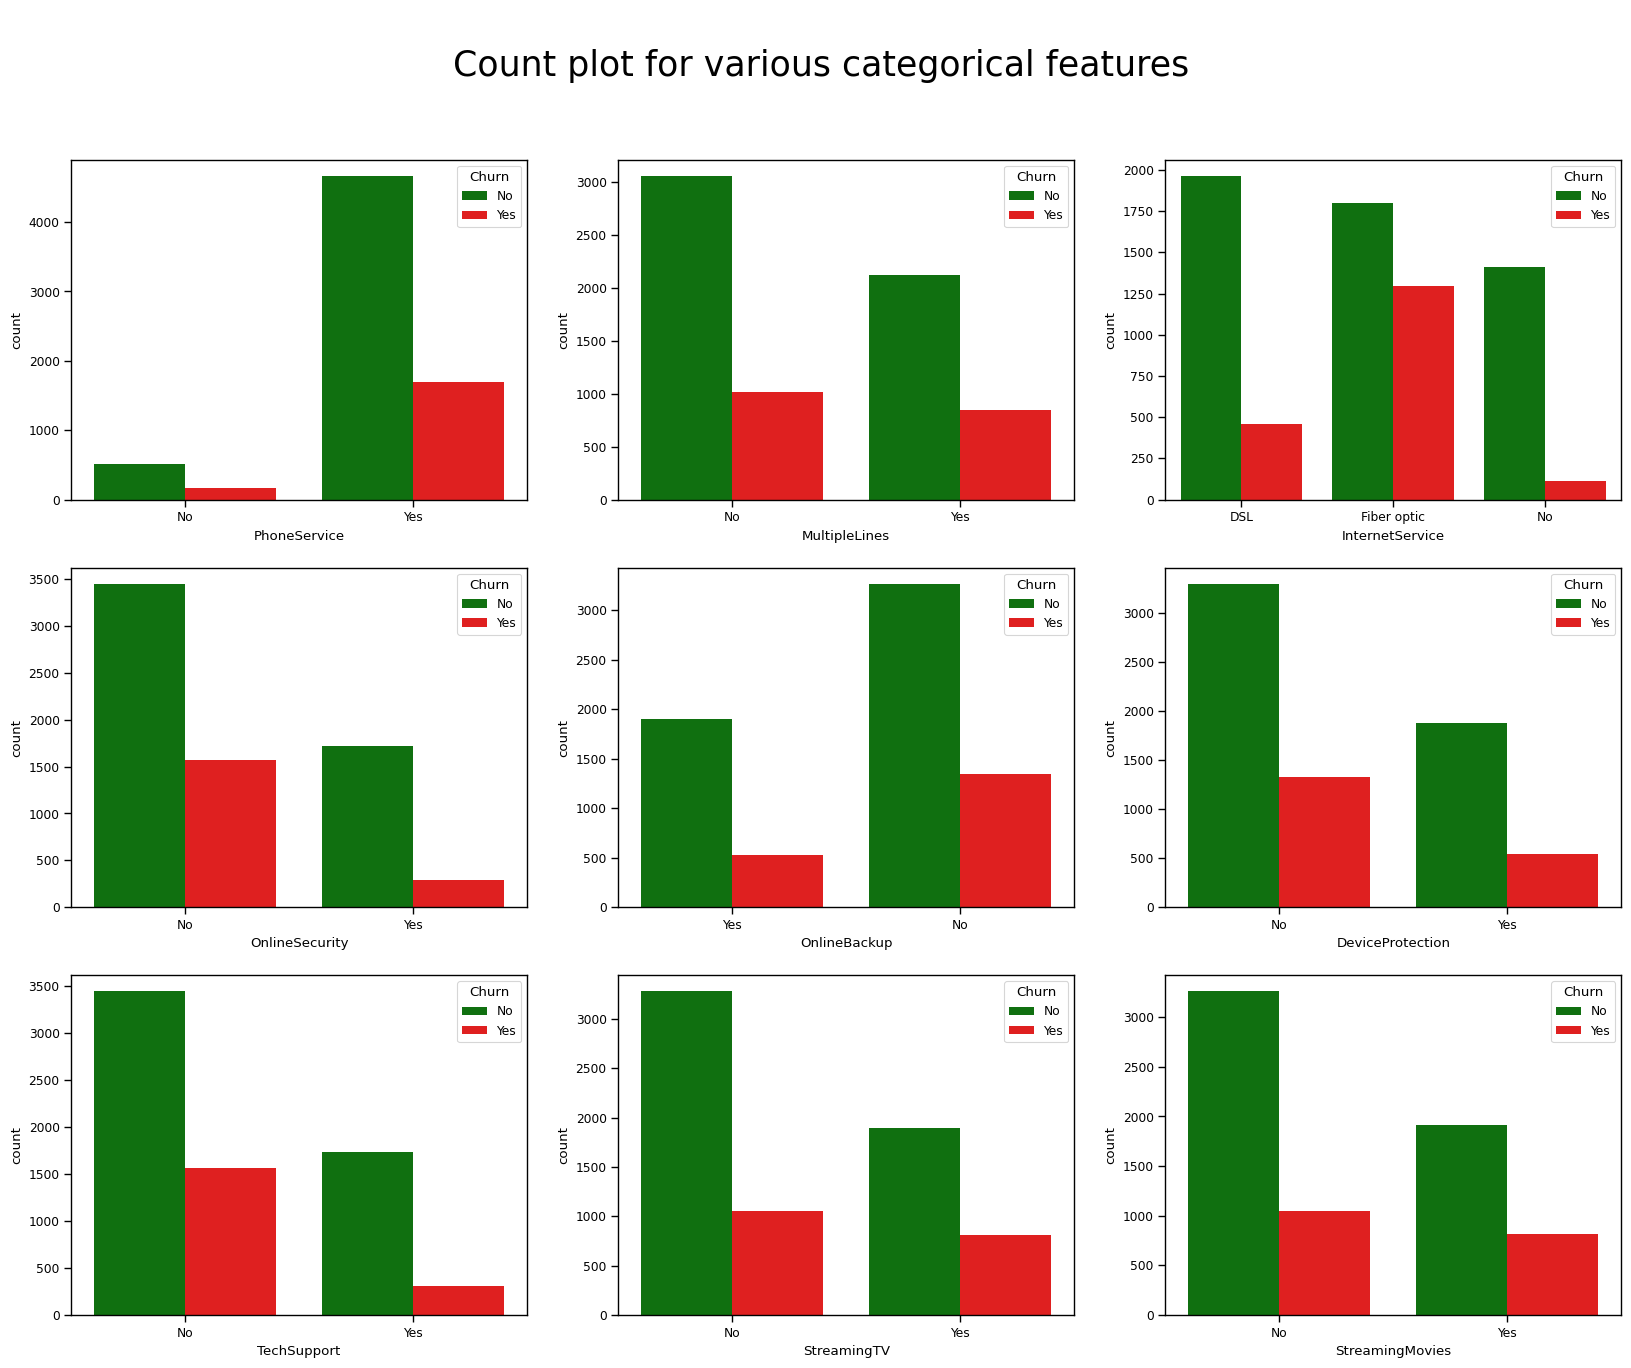

In [33]:
sns.set_context("paper",font_scale=1)
list_feature = ['PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
plot_various_categorial(df, list_feature, 'Churn', 3, 3, (20, 15))

Customers having __Fiber Optic internet service are more likely to churn__ compared to other existing categories

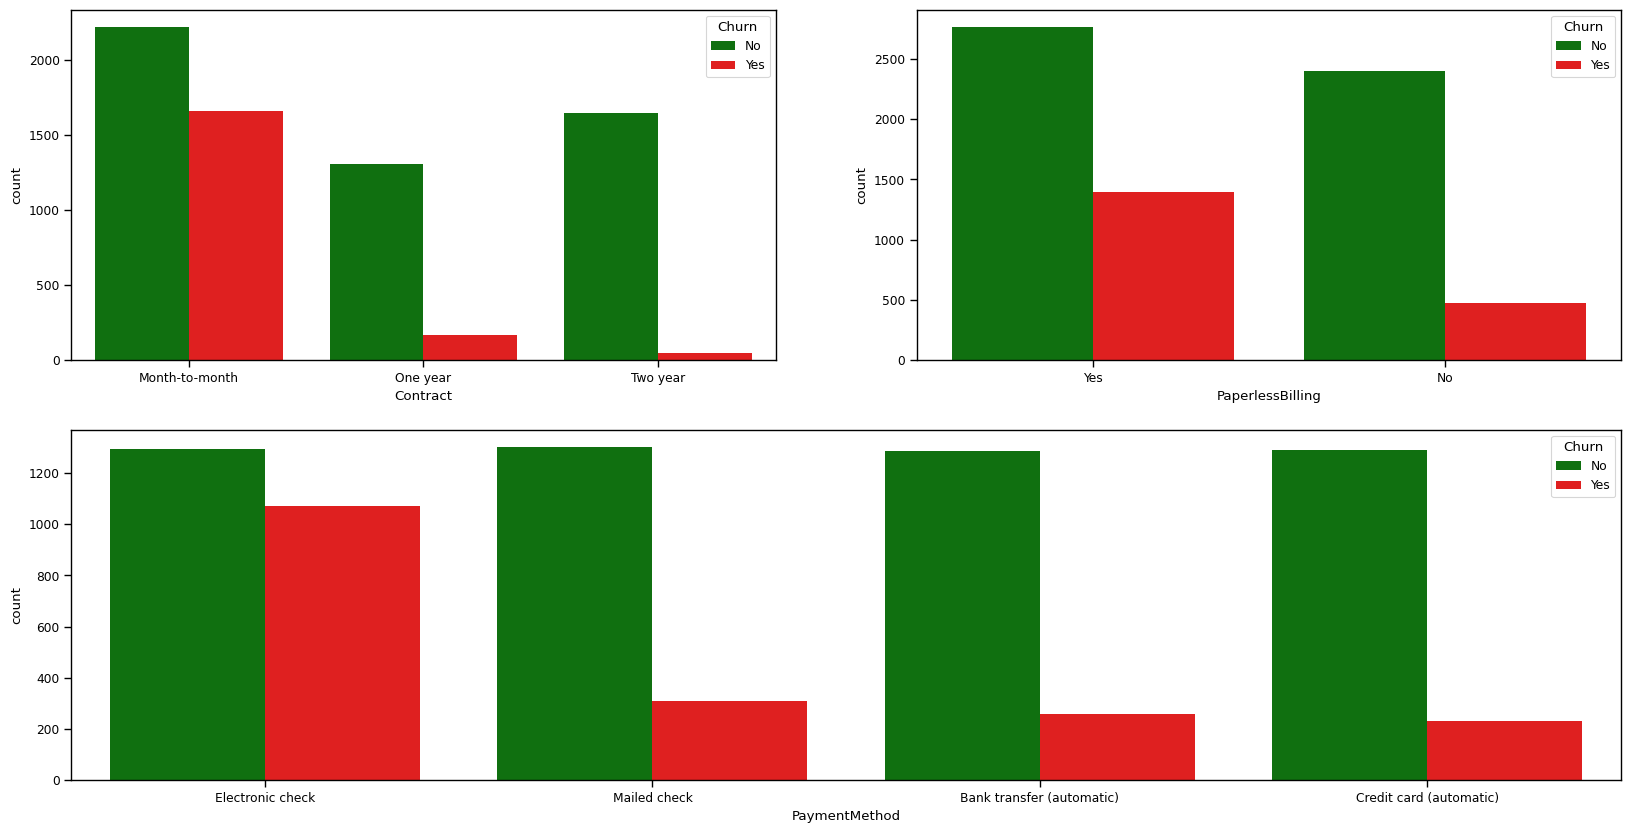

In [57]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize = (20, 10))
ax = plt.subplot(gs[0, 0])
ax = sns.countplot(x ='Contract', data= df, hue= 'Churn', palette= ['g', 'r'])

ax = plt.subplot(gs[0, 1])
ax = sns.countplot(x ='PaperlessBilling', data= df, hue= 'Churn', palette= ['g', 'r'])

ax = plt.subplot(gs[1, :])
ax = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', palette= ['g', 'r'])

Based on the Account information, __customers having longer contracts are less likely to churn__. While, __customers who use Electronic Check as a payment method have higher chances of churning__ then customers who use other methods